In [1]:
import glob
import pandas as pd

path ='/Users/ryanpurcell/Desktop/LendingClub Combined Data/' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0,usecols=[*range(0,50)], encoding = "ISO-8859-1", low_memory = False,skiprows=[0])
    list_.append(df)
df= pd.concat(list_)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466352 entries, 0 to 42537
Data columns (total 50 columns):
id                            7 non-null object
member_id                     0 non-null float64
loan_amnt                     466345 non-null float64
funded_amnt                   466345 non-null float64
funded_amnt_inv               466345 non-null float64
term                          466345 non-null object
int_rate                      466345 non-null object
installment                   466345 non-null float64
grade                         466345 non-null object
sub_grade                     466345 non-null object
emp_title                     438746 non-null object
emp_length                    445327 non-null object
home_ownership                466345 non-null object
annual_inc                    466341 non-null float64
verification_status           466345 non-null object
issue_d                       466345 non-null object
loan_status                   466345 non-null 

In [2]:
#gradefilter=df['grade']=='B'
#df=df[gradefilter]

In [3]:
#df filter for 36 month term
#df['term']=df['term'].astype('str')
#termfilter= df['term'].str.contains('36')
#df=df.loc[termfilter]

In [4]:
#from datetime import datetime, timedelta

#df['A'] = pd.to_datetime(df['last_pymnt_d'])
#df['A'].dtypes

In [5]:
#df['B'] = pd.to_datetime(df['issue_d'])
#df['B'].dtypes

In [6]:
#df['Difference'] = df['A'] - df['B']

In [7]:
#datefilter=df['Difference']<timedelta(days=180)

In [8]:
#Home Ownership by FUNDED AMNT
a4=(df.pivot_table(index='home_ownership',values='funded_amnt',aggfunc=sum)/df.pivot_table(index='home_ownership',values='funded_amnt',aggfunc=sum).sum()).round(2)
c4=a4.reset_index()
c4=c4.drop([0,2,3])
d4=c4['home_ownership']
b4=c4['funded_amnt']
print(list(d4))
print(list(b4))

['MORTGAGE', 'OWN', 'RENT']
[0.56, 0.08, 0.35]


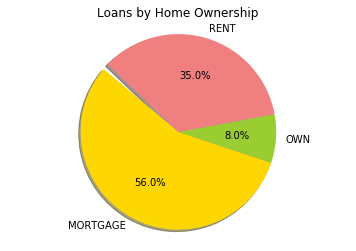

In [9]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = list(d4)
sizes = list(b4)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Loans by Home Ownership')
plt.show()

In [10]:
#Charge Off Probability
Total=df.groupby(['home_ownership'])['funded_amnt'].count()
df1=df[(df.loan_status=='Charged Off')]
df2=df1.groupby(['home_ownership'])['funded_amnt'].count()
df3=(df2/Total).round(2)
df4=df3.reset_index()
df4=df4.drop([0,2,3])
df4=df4.sort_values(by=['funded_amnt'],ascending = False)
purpose = df4['home_ownership']
CO=df4['funded_amnt']
df4
#find out how to name the columns
#sort by default

,home_ownership,funded_amnt
5,RENT,0.18
4,OWN,0.16
1,MORTGAGE,0.14


In [11]:
def format_func(value, tick_number): 
    # find number of multiples of pi/2 
    N = int(np.round(value*100)) 
    if N > 0: 
        return "{:}%".format(N) #// 2) 
    else: 
        return 0
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

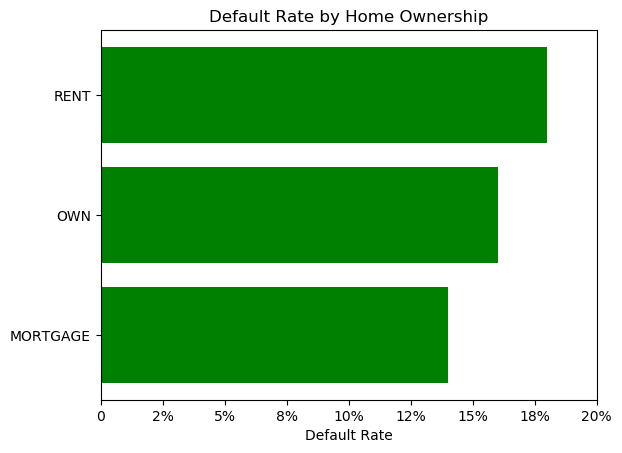

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
#np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = purpose
y_pos = np.arange(len(people))
performance = CO
error = np.random.rand(len(people))

ax.barh(y_pos, performance, color = 'green', )#xerr=error, align='center')
        #color='green',ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Default Rate')
#ax.set_title('Default Rate by Loan Purpose')
ax.set_xlim(0,.20)
plt.title('Default Rate by Home Ownership')
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.show()

In [13]:
df['performance']=(df['total_pymnt']/df['funded_amnt'])-1

In [14]:
#df filter for 36 month term
termfilterPurpose1= df['home_ownership'] == 'RENT'
termfilterPurpose2= (df['home_ownership'] == 'OWN') | (df['home_ownership'] == 'MORTGAGE') 
dfPurpose1=df.loc[termfilterPurpose1]
dfPurpose2=df.loc[termfilterPurpose2]

pf = dfPurpose1['performance']
pf1=dfPurpose2['performance']

import scipy.stats as st
st.ttest_ind(pf1,pf)

Ttest_indResult(statistic=13.753613834252182, pvalue=4.9396279996595636e-43)

In [15]:
dfPurpose1['performance'].mean()

0.07786646916275809

In [16]:
dfPurpose2['performance'].mean()

0.08843163742244832

In [17]:
#remove other and none